In [1]:
import pickle

import matplotlib.pyplot as plt
import torch

In [2]:
with open("instance.pickle", "rb") as file:
    instance = pickle.load(file)

In [3]:
(k, m, n, stdev) = (instance.k, instance.m, instance.n, instance.stdev)
(A, x0, noise, y) = (instance.A, instance.x0, instance.noise, instance.y)

In [4]:
tau = 1 / stdev**2  # noise is known
xi = 1e4

In [5]:
mu = torch.zeros(n)
Gamma = torch.eye(n)
w = torch.ones(n)

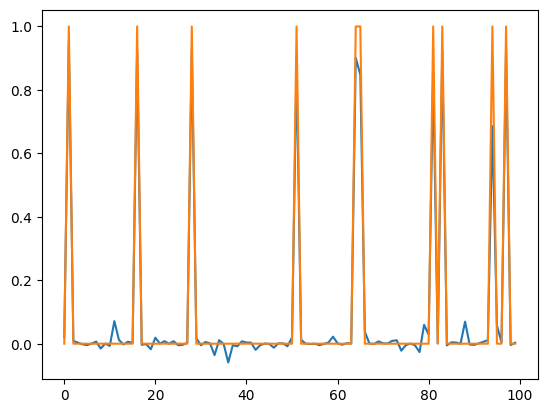

In [7]:
for _ in range(100):
    Winv = w.reciprocal().diag()
    K = torch.eye(m)/tau + A @ Winv @ A.t()
    Kinv = torch.linalg.inv(K)

    mu = A.t() @ Kinv @ y / w

    Gamma_diag = w.reciprocal() - torch.sum((Kinv @ A / w) * A / w, dim=0)
    
    m2 = mu.square() + Gamma_diag
    w = (xi / (m2 + 1e-9)).sqrt()

plt.plot(mu);
plt.plot(x0);

### Takeaways

1. The Woodbury identity is super handy after all.
2. The next step is a partial Fourier VRLS notebook.